In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
import seaborn as sns

In [5]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())

True
3


In [6]:
# ヒートマップの描画関数
def draw_pcm(partial_corr_matrix):
    plt.figure(figsize=(20, 10))

    ax = sns.heatmap(partial_corr_matrix, 
                annot=True, 
                fmt='g', 
                cmap='Blues', 
                annot_kws={"size":7})

    sns.set(font_scale = 2)

    ax.xaxis.tick_top()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=50)

    plt.savefig('./output/heatmap.png')

In [7]:
df = pd.read_excel('../data/230724_0804_AI用qPCRデータ.xlsx', index_col=0, header=1)
df = df.dropna()
df.reset_index(drop=True, inplace=True)
df.head()

glk           agp      yihX           pgm      ptsG          malx  \
0  0.000004  2.982088e-05  0.000004  1.512045e-05  0.000015  9.403729e-07   
1  0.000008  3.062644e-05  0.000016  2.940716e-08  0.000015  3.847846e-06   
2  0.000008  7.608227e-06  0.000016  1.396326e-08  0.000031  9.615077e-07   
3  0.000004  1.513944e-05  0.000015  1.225795e-07  0.000015  4.807837e-07   
4  0.000008  4.768491e-07  0.000031  6.105349e-08  0.000031  9.593193e-07   

        crr      galM          yihR      yeaD  ...      tpiA      gapA  \
0  0.000122  0.000015  4.792578e-07  0.000007  ...  0.000008  0.000121   
1  0.000124  0.000015  3.848767e-06  0.000015  ...  0.000015  0.000123   
2  0.000245  0.000015  4.864569e-07  0.000031  ...  0.000015  0.000122   
3  0.000124  0.000015  1.207673e-07  0.000008  ...  0.000015  0.000061   
4  0.000124  0.000015  2.428970e-07  0.000016  ...  0.000016  0.000124   

            pgk      gpmA      ytjc      gpmM       eno      pykF      pykA  \
0  1.193258e-07  0.000119  0.000004  0.000008  0.000015  0.000030  0.000015   
1  2.377373e-07  0.000123  0.000008  0.000016  0.000031  0.000061  0.000031   
2  9.666787e-07  0.000122  0.000008  0.000016  0.000062  0.000062  0.000031   
3  2.410427e-07  0.000061  0.000004  0.000008  0.000031  0.000062  0.000031   
4  4.795912e-07  0.000124  0.000008  0.000008  0.000031  0.000062  0.000031   

       ppsA  
0  0.000030  
1  0.000061  
2  0.000062  
3  0.000062  
4  0.000062  

[5 rows x 33 columns]

In [8]:
# 偏相関行列の計算
partial_corr_matrix = pg.pcorr(df).round(3)
partial_corr_matrix.head()

glk    agp   yihX    pgm   ptsG   malx    crr   galM   yihR   yeaD  \
glk   1.000  0.108  0.241  0.322 -0.242 -0.118 -0.141 -0.070 -0.131 -0.105   
agp   0.108  1.000 -0.026  0.108 -0.016  0.148  0.386  0.253  0.169 -0.115   
yihX  0.241 -0.026  1.000 -0.114  0.183  0.081  0.106  0.178  0.042  0.115   
pgm   0.322  0.108 -0.114  1.000  0.494  0.115  0.174  0.062  0.158  0.160   
ptsG -0.242 -0.016  0.183  0.494  1.000  0.036 -0.040 -0.159  0.168  0.079   

      ...   tpiA   gapA    pgk   gpmA   ytjc   gpmM    eno   pykF   pykA  \
glk   ...  0.237 -0.051 -0.095 -0.191  0.572  0.289 -0.012  0.061 -0.114   
agp   ...  0.190  0.114  0.267  0.071 -0.087 -0.247  0.032  0.086  0.083   
yihX  ...  0.048  0.025  0.149 -0.101 -0.062 -0.275  0.055  0.106  0.076   
pgm   ... -0.373  0.467  0.278 -0.035 -0.306 -0.299  0.143 -0.060  0.037   
ptsG  ...  0.162 -0.194 -0.246 -0.080  0.256  0.095 -0.137  0.064 -0.002   

       ppsA  
glk  -0.121  
agp  -0.009  
yihX -0.186  
pgm  -0.085  
ptsG -0.041  

[5 rows x 33 columns]

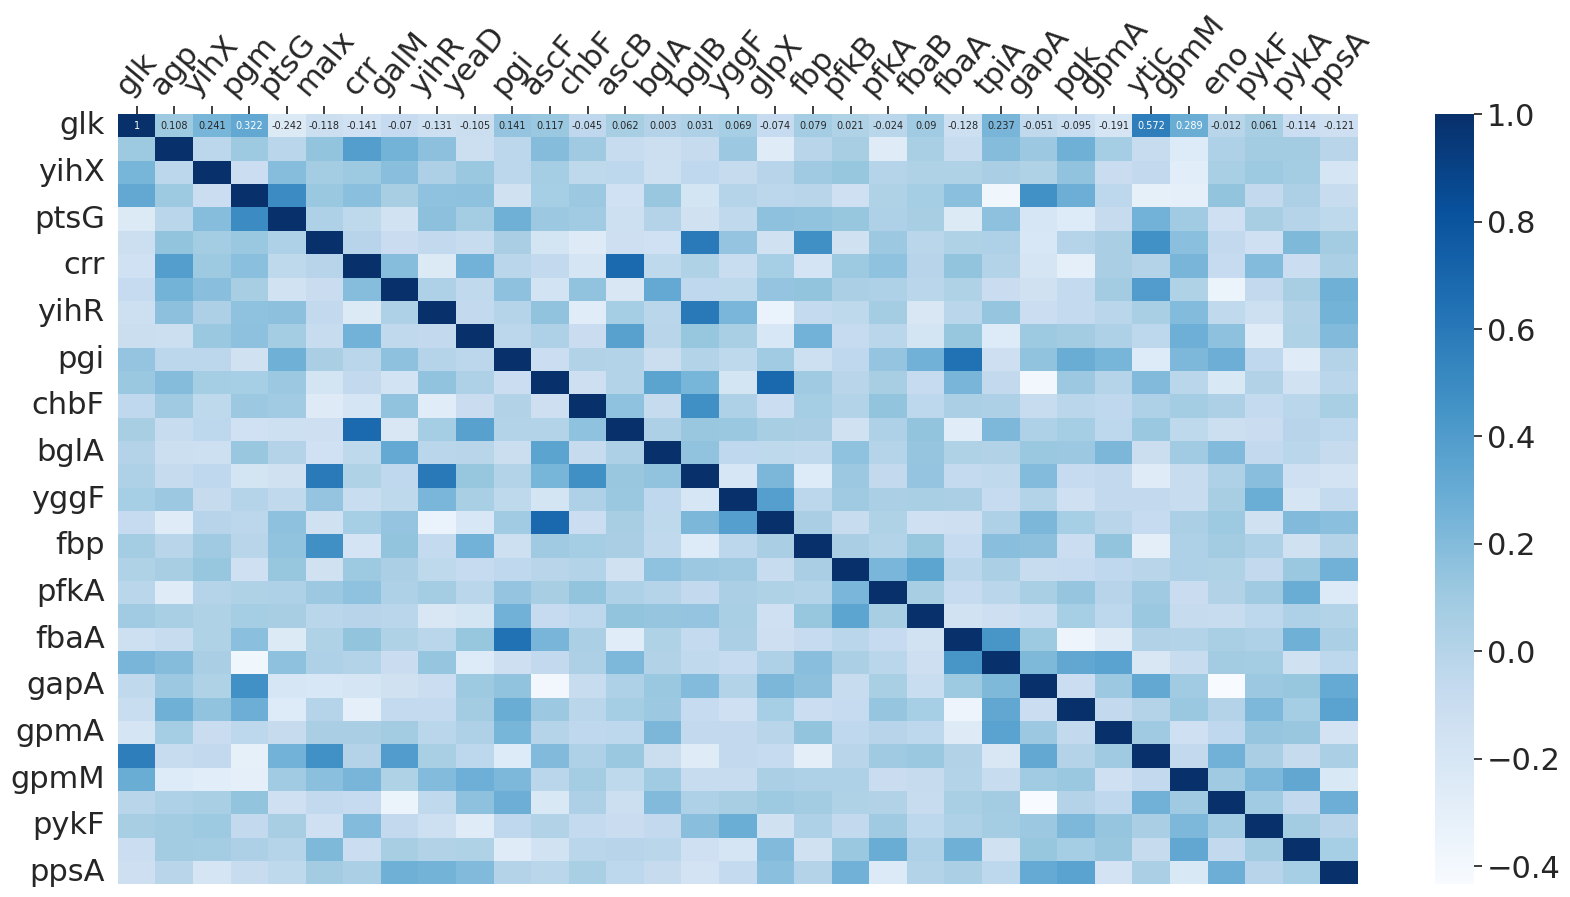

In [12]:
draw_pcm(partial_corr_matrix)

In [13]:
# yとの相関係数を表示
corr_y = pd.DataFrame({"features":df.columns,"corr_y":partial_corr_matrix["ascF"]},index=None)
corr_y = corr_y.reset_index(drop=True)
corr_y.style.background_gradient()

In [22]:
# 連続値 →　離散値に変更
df_new = df.copy()

for i in range(len(df_new.columns)):
    df_new.iloc[:, i] = pd.qcut(df_new.iloc[:, i], 3)
    # contingency_table = pd.crosstab(df_new[])

df_new

glk                       agp  \
0    (-0.00099629, 1.52e-05]  (-0.000999523, 3.03e-05]   
1    (-0.00099629, 1.52e-05]      (3.03e-05, 3.07e-05]   
2    (-0.00099629, 1.52e-05]  (-0.000999523, 3.03e-05]   
3    (-0.00099629, 1.52e-05]  (-0.000999523, 3.03e-05]   
4    (-0.00099629, 1.52e-05]  (-0.000999523, 3.03e-05]   
..                       ...                       ...   
106     (1.52e-05, 1.55e-05]      (3.07e-05, 0.000124]   
107  (-0.00099629, 1.52e-05]      (3.03e-05, 3.07e-05]   
108     (1.52e-05, 1.55e-05]      (3.03e-05, 3.07e-05]   
109  (-0.00099629, 1.52e-05]  (-0.000999523, 3.03e-05]   
110  (-0.00099629, 1.52e-05]      (3.07e-05, 0.000124]   

                        yihX                         pgm  \
0    (-0.00099631, 1.55e-05]        (7.71e-06, 1.54e-05]   
1       (1.55e-05, 3.11e-05]  (-0.00099999236, 7.71e-06]   
2       (1.55e-05, 3.11e-05]  (-0.00099999236, 7.71e-06]   
3    (-0.00099631, 1.55e-05]  (-0.00099999236, 7.71e-06]   
4       (3.11e-05, 0.000126]  (-0.00099999236, 7.71e-06]   
..                       ...                         ...   
106     (3.11e-05, 0.000126]        (1.54e-05, 6.31e-05]   
107  (-0.00099631, 1.55e-05]        (7.71e-06, 1.54e-05]   
108     (1.55e-05, 3.11e-05]        (1.54e-05, 6.31e-05]   
109  (-0.00099631, 1.55e-05]  (-0.00099999236, 7.71e-06]   
110     (1.55e-05, 3.11e-05]        (1.54e-05, 6.31e-05]   

                        ptsG                      malx  \
0    (-0.00099613, 3.11e-05]  (-0.000999762, 9.82e-07]   
1    (-0.00099613, 3.11e-05]       (1.94e-06, 7.8e-06]   
2       (3.11e-05, 3.17e-05]  (-0.000999762, 9.82e-07]   
3    (-0.00099613, 3.11e-05]  (-0.000999762, 9.82e-07]   
4       (3.11e-05, 3.17e-05]  (-0.000999762, 9.82e-07]   
..                       ...                       ...   
106     (3.11e-05, 3.17e-05]       (1.94e-06, 7.8e-06]   
107     (3.11e-05, 3.17e-05]      (9.82e-07, 1.94e-06]   
108     (3.11e-05, 3.17e-05]       (1.94e-06, 7.8e-06]   
109  (-0.00099613, 3.11e-05]      (9.82e-07, 1.94e-06]   
110      (3.17e-05, 0.00025]       (1.94e-06, 7.8e-06]   

                        crr                                galM  \
0    (-0.0009697, 0.000123]                (1.44e-05, 1.54e-05]   
1      (0.000123, 0.000124]                (1.54e-05, 3.13e-05]   
2       (0.000124, 0.00398]                (1.44e-05, 1.54e-05]   
3      (0.000123, 0.000124]                (1.54e-05, 3.13e-05]   
4       (0.000124, 0.00398]                (1.44e-05, 1.54e-05]   
..                      ...                                 ...   
106     (0.000124, 0.00398]                (1.54e-05, 3.13e-05]   
107    (0.000123, 0.000124]                (1.44e-05, 1.54e-05]   
108    (0.000123, 0.000124]                (1.44e-05, 1.54e-05]   
109  (-0.0009697, 0.000123]  (-0.0009981200000000001, 1.44e-05]   
110     (0.000124, 0.00398]                (1.54e-05, 3.13e-05]   

                          yihR                     yeaD  ...  \
0         (2.43e-07, 9.41e-07]  (-0.00099841, 7.69e-06]  ...   
1         (9.41e-07, 1.59e-05]     (7.69e-06, 1.55e-05]  ...   
2         (2.43e-07, 9.41e-07]     (1.55e-05, 0.000505]  ...   
3    (-0.0009999401, 2.43e-07]     (7.69e-06, 1.55e-05]  ...   
4         (2.43e-07, 9.41e-07]     (1.55e-05, 0.000505]  ...   
..                         ...                      ...  ...   
106       (9.41e-07, 1.59e-05]     (1.55e-05, 0.000505]  ...   
107       (9.41e-07, 1.59e-05]     (7.69e-06, 1.55e-05]  ...   
108       (9.41e-07, 1.59e-05]     (1.55e-05, 0.000505]  ...   
109       (9.41e-07, 1.59e-05]  (-0.00099841, 7.69e-06]  ...   
110       (2.43e-07, 9.41e-07]     (1.55e-05, 0.000505]  ...   

                       tpiA                    gapA                       pgk  \
0    (-0.00099841, 7.8e-06]    (6.15e-05, 0.000123]  (-0.000999881, 6.15e-05]   
1       (7.8e-06, 1.56e-05]    (6.15e-05, 0.000123]  (-0.000999881, 6.15e-05]   
2       (7.8e-06, 1.56e-05]    (6.15e-05, 0.000123]  (-0.000999881, 6.15e-05]   
3       (7.8

In [23]:
from pgmpy.estimators import PC

pc = PC(df_new)
model = pc.estimate()

Working for n conditional variables: 0:   0%|          | 0/5 [00:00<?, ?it/s]/home/yarita/.local/lib/python3.9/site-packages/pgmpy/estimators/CITests.py:540: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([X, Y]).size().unstack(Y, fill_value=0), lambda_=lambda_
/home/yarita/.local/lib/python3.9/site-packages/pgmpy/estimators/CITests.py:540: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby([X, Y]).size().unstack(Y, fill_value=0), lambda_=lambda_
/home/yarita/.local/lib/python3.9/site-packages/pgmpy/estimators/CITests.py:540: FutureWarning: The default of observed=False is deprecated and w

In [24]:
from pyvis import network as net
import networkx as nx

edge_list = list(model.edges())
edge_list = [i + tuple([0.1]) for i in edge_list]#ウェイトの値を適当に追加

#jupyter中に表示させる場合、notebook=True, →にする場合directed=True
got_net = net.Network(notebook=True,directed=True)

for e in edge_list:
    src = e[0]
    dst = e[1]
    w = e[2]

    got_net.add_node(src, src, title=src)
    got_net.add_node(dst, dst, title=dst)
    got_net.add_edge(src, dst, value=w)

neighbor_map = got_net.get_adj_list()

for node in got_net.nodes:
    node['title'] += ' Neighbors:<br>' + '<br>'.join(neighbor_map[node['id']])
    node['value'] = len(neighbor_map[node['id']])
    
got_net.show_buttons(True)

got_net.show('./output/gameofthrones.html')

./output/gameofthrones.html
